<a href="https://colab.research.google.com/github/550tealeaves/DATA-70500-working-with-data/blob/main/Baseball_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sb
import math
import matplotlib.pyplot as plt

In [17]:
#import dataset
baseball_df = pd.read_csv('https://raw.githubusercontent.com/550tealeaves/DATA-70500-working-with-data/refs/heads/main/datasets/player_stats.csv')

baseball_df.head()

,Year,White,Black,Latino,Asian
0,1947,98.3,0.9,0.7,0.0
1,1948,98.5,0.7,0.7,0.0
2,1949,96.6,1.5,1.9,0.0
3,1950,95.3,1.7,3.0,0.0
4,1951,94.3,2.9,2.8,0.0


In [18]:
baseball_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    76 non-null     int64  
 1   White   76 non-null     float64
 2   Black   76 non-null     float64
 3   Latino  76 non-null     float64
 4   Asian   76 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 3.1 KB


In [19]:
baseball_df.describe()

,Year,White,Black,Latino,Asian
count,76.000000,76.000000,76.000000,76.000000,76.000000
mean,1984.552632,71.943421,11.551316,15.794737,0.614474
std,22.171089,11.117714,5.235379,9.208357,0.885544
min,1947.000000,57.500000,0.700000,0.700000,0.000000
25%,1965.750000,63.075000,7.350000,9.500000,0.000000
50%,1984.500000,70.200000,11.700000,11.750000,0.000000
75%,2003.250000,77.250000,16.725000,26.575000,1.425000
max,2023.000000,98.500000,18.700000,31.900000,3.200000


In [20]:
baseball_df.columns

Index(['Year', 'White', 'Black', 'Latino', 'Asian'], dtype='object')

In [21]:
baseball_df['White']

,White
0,98.3
1,98.5
2,96.6
3,95.3
4,94.3
...,...
71,59.0
72,60.2
73,62.3
74,62.1


In [22]:
# convert year column into date/time
baseball_df['Year'] = pd.to_datetime(baseball_df['Year'], format='%Y')

In [ ]:
baseball_df.info()

# Visualization

### **Line chart**
- plt.plot(x, y1, label='Line 1') is the formula

1.   Set x = year
2.   Set y1 = white player col
3.   Set y2 = black player col
4.   Set y3 = latino player col
5.   Set y4 = asian player col




In [23]:
# assign the Year column w/ all its values to the variable (x)
x = baseball_df['Year']

In [24]:
# check to make sure if that works
x

,Year
0,1947-01-01
1,1948-01-01
2,1949-01-01
3,1950-01-01
4,1951-01-01
...,...
71,2018-01-01
72,2020-01-01
73,2021-01-01
74,2022-01-01


In [25]:
y1 = baseball_df['White']

In [26]:
y1

,White
0,98.3
1,98.5
2,96.6
3,95.3
4,94.3
...,...
71,59.0
72,60.2
73,62.3
74,62.1


In [27]:
y2 = baseball_df['Black']

In [28]:
y3 = baseball_df['Latino']

In [29]:
y4 = baseball_df['Asian']

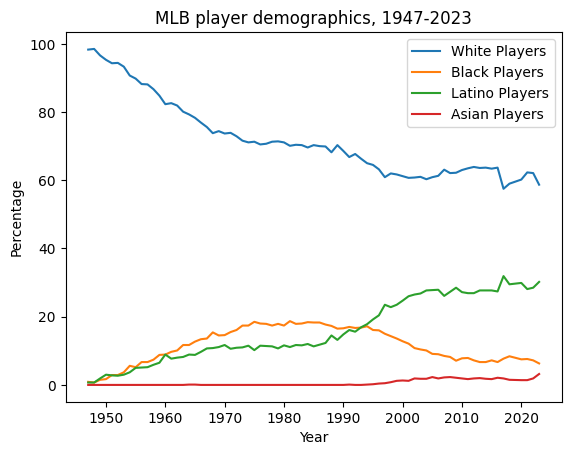

In [42]:
plt.plot(x, y1, label='White Players')
plt.plot(x, y2, label='Black Players')
plt.plot(x, y3, label='Latino Players')
plt.plot(x, y4, label='Asian Players')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('MLB player demographics, 1947-2023')

# Add a legend
plt.legend()

# Show the plot
plt.show()

## Summary
- The percentage of Black players has steadily declined since the mid 90s.
- As of 2023, there were a smaller percentage of Black baseball players than when Jackie Robinson retired six decades earlier in 1956.

### **Pie Chart**
- Plot the average amount of each race to see what proportion they take up

In [46]:
#store the mean of white percentage as a variable
white_mean = baseball_df['White'].mean()

In [47]:
#check to see if it works
white_mean

71.94342105263158

In [48]:
#store the mean of black percentage as a variable
black_mean = baseball_df['Black'].mean()

In [49]:
#store the mean of latino percentage as a variable
latino_mean = baseball_df['Latino'].mean()

In [35]:
#store the mean of asian percentage as a variable
asian_mean = baseball_df['Asian'].mean()

In [50]:
# store the array of variables as a new variable for the pie chart formula
sizes = [white_mean, black_mean, latino_mean, asian_mean]

In [51]:
#check to see if the variable works
sizes

[71.94342105263158, 11.551315789473684, 15.794736842105264, 0.6144736842105263]

In [52]:
# Store the variables to match the order of the means
labels = "White", "Blacks", "Latino", "Asians"

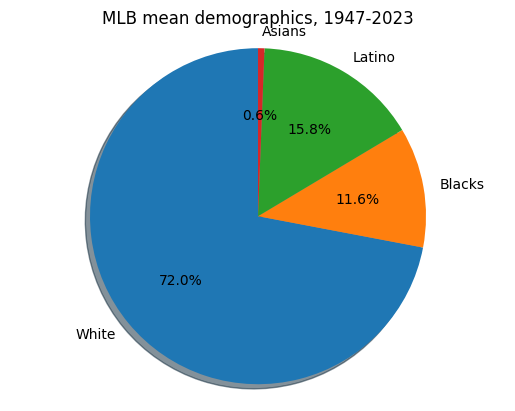

In [54]:
# plot, include autopct (to show percetages), shadow (optional, shows depth), change startangle to 90 (rotates the cart)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("MLB mean demographics, 1947-2023")
plt.show()

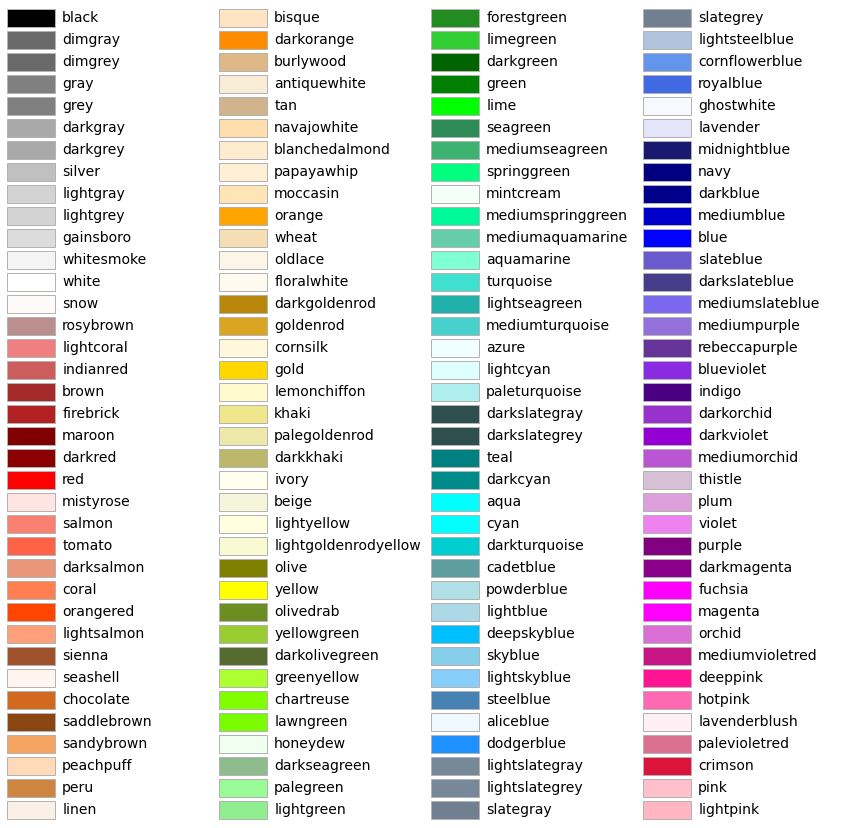

In [40]:
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle

def plot_colortable(colors, *, ncols=4, sort_colors=True):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        names = sorted(
            colors, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))
    else:
        names = list(colors)

    n = len(names)
    nrows = math.ceil(n / ncols)

    width = cell_width * ncols + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * ncols)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig


plot_colortable(mcolors.CSS4_COLORS)
plt.show()

In [41]:
#https://plotly.com/python/treemaps/
import plotly.graph_objects as go

values = [0, 11, 12, 13, 14, 15, 20, 30]
labels = ["container", "A1", "A2", "A3", "A4", "A5", "B1", "B2"]
parents = ["", "container", "A1", "A2", "A3", "A4", "container", "B1"]

fig = go.Figure(go.Treemap(
    labels = labels,
    values = values,
    parents = parents,
    root_color="lightblue"
))

fig.update_layout(
    treemapcolorway = ["pink", "lightgray"],
    margin = dict(t=50, l=25, r=25, b=25)
)
fig.show()